### Student Activity: Market Analysis

This program reads daily stock data from a CSV and plots three different charts for three different analyses: pie (sector frequency distribution), bar (top 20 market cap companies), and scatter (price vs. earnings relationship).

In [1]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSV in as DataFrame

In [5]:
# Set the path
file_path = Path('../Resources/vault-december.csv')

# Read in the CSV as a DataFrame
JS = pd.read_csv(file_path)
JS.head()

,Location,Supply Source,Item #,Name,Qty. On Hand,Par Level,Min Level,Reorder Qty,Custom #,Bin #,Price,GL #,Pack Count,Custom 1,Custom 2,Custom 3,Ext. Price
0,Sumner Vault,Amazon,P085,UrinalDeodorizer_15pc/pk,0,0,0,0,SUPPLIES,NaN,29.97,NaN,1,NaN,NaN,NaN,0.0
1,Sumner Vault,Amazon,P086,BinderClips_96pc/bx,0,0,0,0,SUPPLIES,NaN,9.13,NaN,1,NaN,NaN,NaN,0.0
2,Sumner Vault,Amazon,P087,BroomHolder,0,0,0,0,SUPPLIES,NaN,13.49,NaN,1,NaN,NaN,NaN,0.0
3,Sumner Vault,DAWN FOODS INC,I071,VanillaCremeCakeMix_Balance_50lb/bg Item#02379552,0,0,0,0,INGREDIENT,NaN,103.34,NaN,1,NaN,NaN,NaN,0.0
4,Sumner Vault,SA MILLIGAN,712001-950,AllSpice_PacificSpiceCompany_50lb/bg Item#7120...,0,0,0,0,INGREDIENT,NaN,300.00,NaN,1,NaN,NaN,NaN,0.0


### Calculate supply sources

In [26]:
# Count the frequency of each sector from the list of companies
Supply_source = JS['Supply Source'].value_counts()
Supply_source


Antonina's Bakery              28
Amazon                         25
GREAT LITTLE BOX COMPANY       24
LANDSBERG                      22
Uline                          19
INTERNATIONAL FOOD PRODUCTS    19
MEDOSWEET                      10
SA MILLIGAN                     9
GRIP B                          7
OLIVE NATION                    5
DAWN FOODS INC                  5
BAKE MARK                       5
PINN PACK                       4
PETERSON                        4
COSTCO                          4
CREDIT CARD WILL CALLS          3
SYSCO                           3
BAYCO                           3
THE GINGER PEOPLE               3
CHEF'STORE                      2
FOOD GUYS                       2
FLAVORCHEM                      2
CEREAL INGREDIENTS              2
DSM                             1
BC FOODS                        1
BRIDGEWELL                      1
UNIVAR SOLUTIONS                1
RIA DISTRIBUTION                1
MAVERICK OIL                    1
HYGIENA       

In [27]:
Total_dollars = JS.iloc[:, [16]].sum()
Total_dollars

 Ext. Price    825297.18
dtype: float64

### Plot Sector Counts

In [30]:
JS.describe()


,Qty. On Hand,Par Level,Min Level,Reorder Qty,Bin #,Price,GL #,Pack Count,Custom 1,Custom 2,Custom 3,Ext. Price
count,219.000000,219.0,219.0,219.000000,0.0,219.000000,0.0,219.0,0.0,0.0,0.0,219.000000
mean,82.232877,0.0,0.0,0.347032,NaN,183.639361,NaN,1.0,NaN,NaN,NaN,3768.480274
std,267.287162,0.0,0.0,2.071681,NaN,911.171290,NaN,0.0,NaN,NaN,NaN,10254.310978
min,0.000000,0.0,0.0,0.000000,NaN,0.000000,NaN,1.0,NaN,NaN,NaN,0.000000
25%,0.000000,0.0,0.0,0.000000,NaN,31.825000,NaN,1.0,NaN,NaN,NaN,0.000000
50%,7.000000,0.0,0.0,0.000000,NaN,49.780000,NaN,1.0,NaN,NaN,NaN,319.000000
75%,52.500000,0.0,0.0,0.000000,NaN,103.270000,NaN,1.0,NaN,NaN,NaN,2785.350000
max,2206.000000,0.0,0.0,23.000000,NaN,11970.100000,NaN,1.0,NaN,NaN,NaN,87313.480000


<AxesSubplot:>

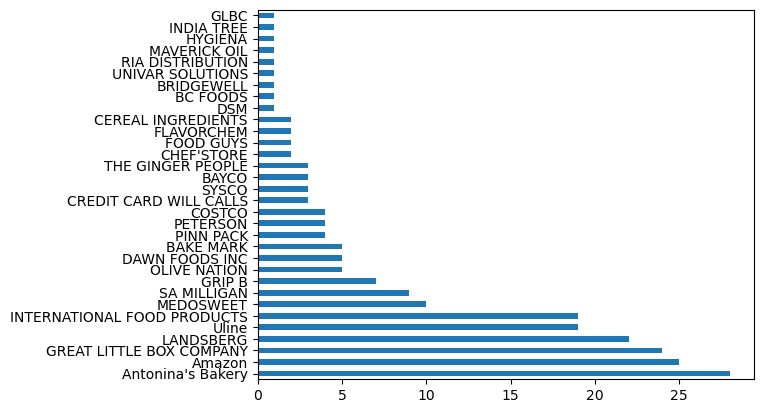

In [24]:
# Plot a pie chart from the distribution of company sectors
Supply_source.plot(kind='barh')
#'line': Line plot
#'bar': Vertical bar plot
#'barh': Horizontal bar plot
#'hist': Histogram
#'box': Box plot
#'kde': Kernel density estimate plot
#'density': Density plot
#'area': Area plot
#'pie': Pie chart
#'scatter': Scatter plot
#'hexbin': Hexbin plot

### Filter By Top 20 Market Cap Companies

In [13]:
# Grab the `Symbol` and `Market Cap` columns
market_cap = sp500_companies_csv.loc[:, ['Symbol', 'Market Cap']]

# Set the 'Symbol' as the index
market_cap.set_index(market_cap['Symbol'], inplace=True)

# Drop the extra 'Symbol' column
market_cap.drop(columns=['Symbol'], inplace=True)

# Filter down to 20 companies with the largest market caps
top_20_market_cap = market_cap.nlargest(20, 'Market Cap')

# Display the DataFrame
top_20_market_cap

,Market Cap
Symbol,
AAPL,809508034020
GOOGL,733823966137
GOOG,728535558140
MSFT,689978437468
AMZN,685873374731
FB,523423036576
JPM,386613611000
JNJ,353062464971
XOM,326148660000


### Plot Top 20 Market Cap Companies

<AxesSubplot:title={'center':'Top 20 Market Cap Companies (in billions)'}, xlabel='Symbol'>

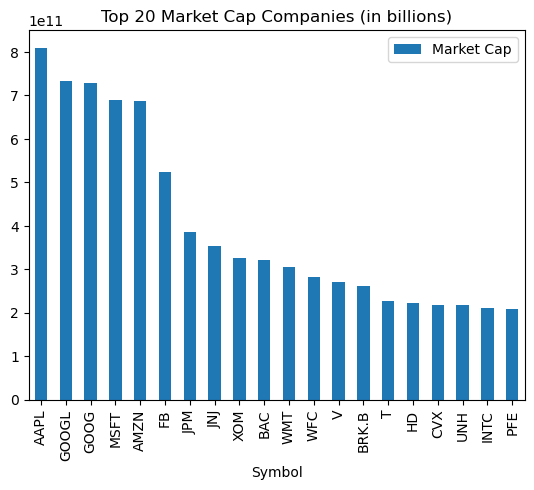

In [14]:
# Plot a bar chart of the top 20 market cap companies
top_20_market_cap.plot(kind='bar', title='Top 20 Market Cap Companies (in billions)')

### Plot Relationship Between Price and Earnings/Share

<AxesSubplot:xlabel='Earnings/Share', ylabel='Price'>

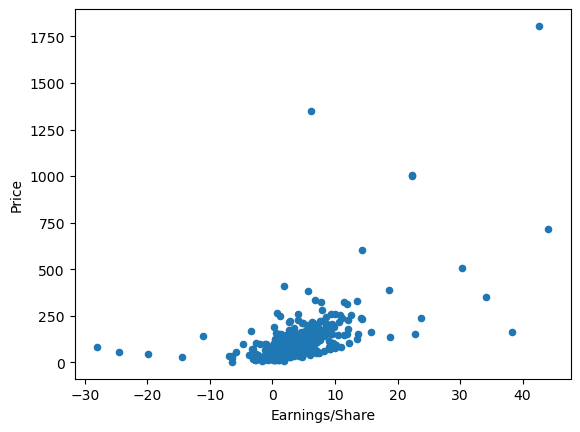

In [15]:
# Plot a scatter plot to display the relationship between price vs. earnings/share
sp500_companies_csv.plot(kind='scatter', x='Earnings/Share', y='Price')